In [1]:
#finds all pathnames matching a pattern, like regex
import glob
#word encoding
import codecs
#natural language toolkit
import nltk
#regular expressions
import re
#stemming
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import time
#parse dataset
import pandas as pd
porter=PorterStemmer()
import numpy as np
import math
from wordcloud import WordCloud
import collections
import matplotlib.pyplot as plt
import os
import math
import string

In [2]:
##stopwords like the at a an, unnecesasry
##tokenization into sentences, punkt 
##http://www.nltk.org/

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Olek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Olek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nasa_filenames = []
nasa_filenamess = sorted(glob.glob("C:\\Users\\Olek\\Documents\\Genéve\\Recherche d'information\\TP1\\nasa\\*.txt"))
count =0
N = 15 #We can take more, but i chose just 15 documents
for child in nasa_filenamess:
    if count < N:
        print(child)
    else:
        break
    count = count+1
    nasa_filenames.append(child)

C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt01995.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt02495.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt02695.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt04395.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt04495.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt04595.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt04795.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt04895.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt04995.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt05095.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt05995.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt07295.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt07895.txt

In [4]:
#initialize raw unicode , i'll add all text to this file in memory
corpus_raw = u""
corpus_raww = []
#for each book, read it, open it in utf 8 format, 
#add it to the raw corpus
for nasa_filename in nasa_filenames:
    print("Reading '{0}'...".format(nasa_filename))
    with codecs.open(nasa_filename, "r", 'unicode_escape') as book_file:
        corpus_raw += book_file.read()
    corpus_raww.append(corpus_raw)   
    print ("Corpus is now {0} characters long".format(len(corpus_raw)))
    print ()

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt01995.txt'...
Corpus is now 4346 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt02495.txt'...
Corpus is now 7633 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt02695.txt'...
Corpus is now 10480 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt04395.txt'...
Corpus is now 14185 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt04495.txt'...
Corpus is now 16835 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt04595.txt'...
Corpus is now 21372 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt04795.txt'...
Corpus is now 24039 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\TP1\nasa\emt04895.txt'...
Corpus is now 27405 cha

In [5]:
#tokenizastion
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [6]:
#tokenize into sentences
raw_sentences = tokenizer.tokenize(corpus_raw)

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [8]:
#sentence where each word is stemmed
sentences_stemmed = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences_stemmed.append(stemSentence(raw_sentence))

In [9]:
#convert into a list of words
#remove unnnecessary, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [10]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in sentences_stemmed:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [11]:
#remove stop words
stop = set(stopwords.words('english'))
wordcount = collections.defaultdict(int)

#count words
pattern = r"\W"
for word in str(sentences).lower().split():
    word = re.sub(pattern, '', word)
    if word not in stop:
        wordcount[word] += 1

In [12]:

sorted_words = {k: v for k, v in sorted(wordcount.items(), key=lambda item: item[1],reverse=True)}


In [13]:
sorted_words

{'technolog': 103,
 'nasa': 85,
 'thi': 84,
 'commerci': 83,
 'develop': 74,
 'model': 71,
 'analysi': 67,
 'comput': 58,
 'use': 57,
 'design': 55,
 'program': 48,
 'structur': 45,
 'process': 36,
 'langley': 36,
 'code': 36,
 'method': 36,
 'ha': 34,
 'transfer': 34,
 'requir': 31,
 'simul': 30,
 'stress': 29,
 'vehicl': 25,
 'load': 24,
 'detail': 24,
 'applic': 24,
 'flow': 24,
 'thermal': 23,
 'partner': 23,
 'equat': 23,
 'object': 22,
 'crack': 21,
 'benefit': 20,
 'problem': 20,
 'system': 19,
 'interest': 19,
 'materi': 19,
 'composit': 19,
 'part': 18,
 'form': 18,
 'softwar': 18,
 'interfac': 18,
 'element': 18,
 'perform': 17,
 'option': 17,
 'work': 17,
 'provid': 17,
 'potenti': 16,
 'research': 16,
 'time': 16,
 'partnership': 16,
 'aircraft': 16,
 'techniqu': 16,
 'opportun': 16,
 'gener': 16,
 'predict': 15,
 'industri': 15,
 'calcul': 15,
 'see': 15,
 'fill': 15,
 'commercialization': 15,
 'user': 15,
 'finit': 15,
 'complex': 14,
 'engin': 14,
 'dynam': 14,
 'appli':

In [14]:
dict(list(sorted_words.items())[0: 10])  

{'technolog': 103,
 'nasa': 85,
 'thi': 84,
 'commerci': 83,
 'develop': 74,
 'model': 71,
 'analysi': 67,
 'comput': 58,
 'use': 57,
 'design': 55}

In [15]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return dict(islice(iterable, n))

n_items = take(50, sorted_words.items())

<IPython.core.display.Javascript object>


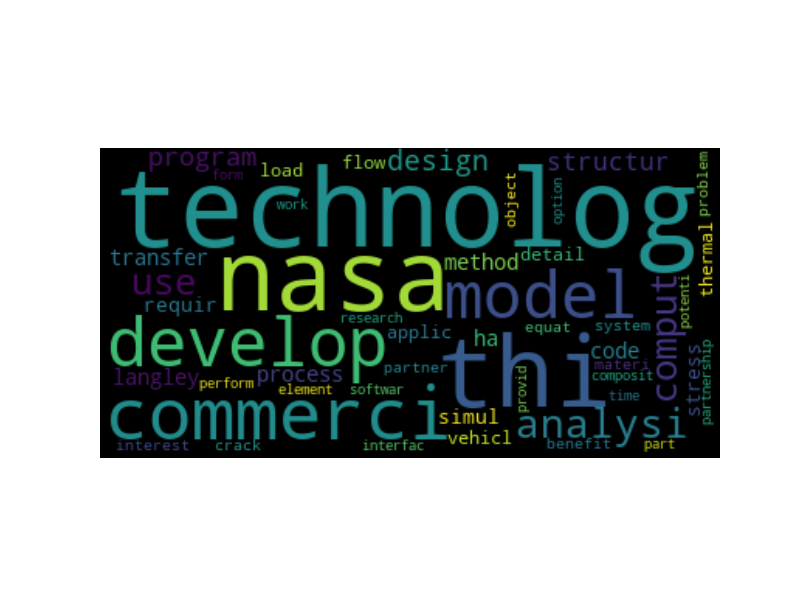

In [16]:
%matplotlib notebook
wc = WordCloud().generate_from_frequencies(n_items)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
# Example
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

Electronic
integration of design and analysis processes was achieved and refined at
NASA Langley Research Center during the development of an optical bench for
a laser-based aerospace experiment.
['Electronic', 'integration', 'of', 'design', 'and', 'analysis', 'processes', 'was', 'achieved', 'and', 'refined', 'at', 'NASA', 'Langley', 'Research', 'Center', 'during', 'the', 'development', 'of', 'an', 'optical', 'bench', 'for', 'a', 'laser', 'based', 'aerospace', 'experiment']


In [18]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens.".format(token_count))

The book corpus contains 7,039 tokens.


In [19]:
####### - Calculating TF - IDF ###########

In [20]:

def doc_freq(word):
    c = 0
    try:
        c = DF[word]
    except:
        pass
    return c

In [21]:
# Cosine Similarity
def cosine_similarity(x, y):
    x_sqrt = np.sqrt(np.dot(x, x))
    y_sqrt = np.sqrt(np.dot(y, y))
    if y_sqrt != 0:     
        return (np.dot(x,y.T) / (x_sqrt * y_sqrt))
    elif y_sqrt == 0:
        return 0

In [22]:
# check cosine_similarity
print (cosine_similarity(np.array([1,2,3]), np.array([1,2,3])))
print (cosine_similarity(np.array([3,4,5]), np.array([3,4,8])))

1.0
0.9743911956946198


In [23]:
import string

def clean_str(texts):
    # input : string that needs to clean all number and signs

    texts = re.sub('cnn',' cnn ', texts)
    texts = re.sub('\'', ' ', texts)
    texts = ''.join(c for c in texts if c not in string.punctuation)
    texts = ''.join([c for c in texts if not c.isdigit()])
    
    return texts

In [24]:
### doc2vocab ###
# Doc 0 : (vocab 1 : num 1), (vocab 2 : num 2), (vocab 3 : num 3)
# Doc 1 : ... 

### vocab2doc ###
# word : [text_num1, text_num2 ... ]

doc2vocab  = dict()
vocab2doc  = dict()

for i in range(0,15):
    doc2vocab[i] = dict()

    with open('C:/Users/Olek/Documents/Genéve/Recherche d\'information/TP1/nasa1/%d.txt' % i, 'r', encoding="utf-8") as doc:
        read_string = doc.read()                       # get sentence as read function
        read_string = read_string.lower()              # sentence lower
        read_string = clean_str(read_string)           # clean all punctuation and number
        
        tokens = nltk.word_tokenize(read_string)       # get tokens of sentence
        #stop = set(stopwords.words('english'))
        #tokens = [j for j in tokens if j not in stop] # get rid of stopwords at token
        
        ### get shape of {doc : {word1 : word1_num, word2 : word2_num, .... }}
        for words in tokens:
            # make document and vocab pair dictionary
            if words in doc2vocab[i]:
                doc2vocab[i][words] += 1
                
            else:
                doc2vocab[i][words] = 1
            
            # make inverted index, {word : [doc1, doc3, ... ]}
            text_str = str(i) + '.txt'
            if words in vocab2doc:
                if text_str not in vocab2doc[words]:
                    vocab2doc[words].append(text_str)
                    
            else:
                vocab2doc[words] = list()
                vocab2doc[words].append(text_str)

In [81]:
### doc2vocab ###
# Doc 0 : (vocab 1 : num 1), (vocab 2 : num 2), (vocab 3 : num 3)
# Doc 1 : ... 

### vocab2doc ###
# word : [text_num1, text_num2 ... ]
doc2vocabb = dict()
doc2vocab  = dict()
vocab2doc2  = dict()

for i in range(0,15):
    #lag = 0
    doc2vocab[i] = dict()
    doc2vocabb = []

    with open('C:/Users/Olek/Documents/Genéve/Recherche d\'information/TP1/nasa1/%d.txt' % i, 'r', encoding="utf-8") as doc:
        read_string = doc.read()                       # get sentence as read function
        read_string = read_string.lower()              # sentence lower
        read_string = clean_str(read_string)           # clean all punctuation and number
        
        tokens = nltk.word_tokenize(read_string)       # get tokens of sentence
        stop = set(stopwords.words('english'))
        tokens = [j for j in tokens if j not in stop] # get rid of stopwords at token
        
        ### get shape of {doc : {word1 : word1_num, word2 : word2_num, .... }}
        for words in tokens:

            # make document and vocab pair dictionary
            if words in doc2vocab[i]:
                doc2vocab[i][words] += 1
                
            else:
                doc2vocab[i][words] = 1
            
            # make inverted index, {word : [doc1, doc3, ... ]}
            text_str = 1
            if words in vocab2doc2:
                
                if words not in doc2vocabb:
                    doc2vocabb.append(words)
                    #ocab2doc[words] = 1
                   #flag = vocab2doc[words]
                    vocab2doc2[words].append(text_str)
                    
            else:
                vocab2doc2[words] = list()
                vocab2doc2[words].append(text_str)

In [26]:
#Probabilistic model

In [27]:
# get query from the query.txt
query = list()

f = open('./Documents/Genéve/Recherche d\'information/TP1/nasa1/1_query.txt', 'r')
query = f.readlines()
#sentence where each word is tokenized
sentences_query = []
for raw_sentence in query:
    if len(raw_sentence) > 0:
        sentences_query.append(sentence_to_wordlist(raw_sentence))
Q_2 = np.squeeze(np.asarray(sentences_query))
Q_2 

array(['integrated', 'analysis'], dtype='<U10')

In [28]:
N_w = dict()
P_w = dict()
P_d = dict()
N = 16
for words in vocab2doc2:
    N_w[words] = sum(vocab2doc2[words])

In [29]:
for words in N_w:
    P_w[words] = (N-N_w[words]+0.5)/(N_w[words]+0.5)

In [30]:
for words in P_w:
    if query == words:
        P_d 

In [31]:
#Probabilistic model with no Relevance (we assume all docs are relevant)
P_qd = dict()
vocab2docc = dict()
for i in range(0,15):
    P_qd[i] = dict()
    P_qd[i] = 1
    for words in doc2vocab[i]:
        text_str = str(i) + '.txt'
        if words in vocab2docc:
            if text_str not in vocab2docc[words]:
                if words in Q_2:
                    P_qd[i] = P_w[words]*P_qd[i]
                    vocab2docc[words].append(text_str)
        else:
            vocab2docc[words] = list()
            vocab2docc[words].append(text_str)
            if words in Q_2:                
                P_qd[i] = P_w[words]*P_qd[i]

In [69]:
P_w['the']

'develop'

In [33]:
sorted_wordss = {k: v for k, v in sorted(P_qd.items(), key=lambda item: item[1],reverse=True)}

In [34]:
sorted_wordss

{1: 2.088,
 5: 1,
 10: 1,
 13: 1,
 14: 1,
 0: 0.36,
 2: 0.36,
 3: 0.36,
 4: 0.36,
 6: 0.36,
 7: 0.36,
 8: 0.36,
 9: 0.36,
 11: 0.36,
 12: 0.36}

In [71]:
term_pd = pd.DataFrame.from_dict(doc2vocab,columns=['the', 'integrated','analysis', 'optical', 'concurrent', 'engineering', 'thermal', 'structural'], orient='index')
term_pd = term_pd.fillna(0)#fill null space with 0
term_pd[:15].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
the,36.0,22.0,25.0,30.0,31.0,12.0,34.0,19.0,26.0,9.0,14.0,30.0,40.0,21.0,36.0
integrated,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
analysis,6.0,15.0,5.0,1.0,7.0,0.0,3.0,8.0,9.0,4.0,0.0,8.0,3.0,0.0,0.0
optical,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
concurrent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
engineering,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
thermal,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,7.0,0.0
structural,0.0,6.0,4.0,0.0,2.0,0.0,0.0,2.0,4.0,0.0,0.0,5.0,0.0,3.0,0.0


In [61]:
#Vector model / tf-idf

In [37]:
term_pd = pd.DataFrame.from_dict(doc2vocab, orient='index')
term_pd = term_pd.fillna(0)#fill null space with 0

In [38]:
#sentence where each word is stemmed
sentences_stemmed = []
for raw_sentence in query:
    if len(raw_sentence) > 0:
        sentences_stemmed.append(stemSentence(raw_sentence))
       

In [39]:
def doc_tf_idf(dataframe, query):
    
    # query tf-idf
    _, width = dataframe.shape
    final = list()
    
    # document tf-idf 
    new_tf = dataframe
    doc_term_value = dataframe[dataframe > 0].count().values # get array of number that document has that term
    doc_frequency = np.log(17 / (doc_term_value + 1))
    
    start = time.time()
    for i in range(len(dataframe)):
        results = np.zeros(width)
        one_row = dataframe.loc[i]
        row_value = one_row.values
        row_index = one_row.index
        
        for j,term in enumerate(row_index):
            if row_value[j] > 0:
                #term_frequency = 1 + np.log(row_value[j])
                term_frequency = np.log(row_value[j] + 1)
                new_tf.iloc[i,j] = term_frequency * doc_frequency[j]
                    
            elif row_value[j] == 0:
                term_frequency = 0
                new_tf.iloc[i,j] = 0
                
            if term in query:
                new_column = dataframe[[term]]
                new_col_value = new_column[new_column > 0].count().values
                results[j] = term_frequency * (np.log(17 / (new_col_value[0]+1)))
        
        final.append((i, cosine_similarity(new_tf.loc[i].values, results)))
    
        if i % 10 == 0:
            print ('step : %d, time : %f' % (i, time.time()-start))
            
    return new_tf, final

query_token = nltk.word_tokenize(query[0])
term_doc_matrix, query_tf_idf = doc_tf_idf(term_pd, query_token)

step : 0, time : 0.423503
step : 10, time : 3.689604


In [40]:
def doc_tf_query(dataframe, query):
    
    # query tf-idf
    _, width = dataframe.shape
    final = list()
    
    # document tf-idf 
    new_tf = dataframe
    doc_term_value = dataframe[dataframe > 0].count().values # get array of number that document has that term
    doc_frequency = np.log(17 / (doc_term_value + 1))
    
    start = time.time()
    for i in range(len(dataframe)):
        results = np.zeros(width)
        one_row = dataframe.loc[i]
        row_value = one_row.values
        row_index = one_row.index
        
        for j,term in enumerate(row_index):
            if row_value[j] > 0:
                #term_frequency = 1 + np.log(row_value[j])
                term_frequency = np.log(row_value[j] + 1)
                new_tf.iloc[i,j] = term_frequency * doc_frequency[j]
                    
            elif row_value[j] == 0:
                term_frequency = 0
                new_tf.iloc[i,j] = 0
                
            if term in query:
                new_column = dataframe[[term]]
                new_col_value = new_column[new_column > 0].count().values
                results[j] = term_frequency #* (np.log(17 / (new_col_value[0]+1)))
        
        final.append((i, cosine_similarity(new_tf.loc[i].values, results)))
    
        if i % 10 == 0:
            print ('step : %d, time : %f' % (i, time.time()-start))
            
    return results, final

query_token = nltk.word_tokenize(query[0])
new_column, query_tf_idf = doc_tf_query(term_pd, query_token)

step : 0, time : 0.331274
step : 10, time : 3.636852


In [41]:
query[0]

'integrated analysis'

In [42]:
query_tf_idf

[(0, 0.006703963707597019),
 (1, 0),
 (2, 0.0026063890465570657),
 (3, 0),
 (4, 0.0011966840082472704),
 (5, 0.04932248457026648),
 (6, 0.0004946224842508007),
 (7, 0.04183223581843044),
 (8, 0.03674806600163622),
 (9, 0),
 (10, 0.11636900204752053),
 (11, 0),
 (12, 0.004849841314700201),
 (13, 0),
 (14, 0)]

In [43]:
print (term_doc_matrix[['visualization']])
print (term_doc_matrix[['nasa']])

    visualization
0        3.944958
3        0.000000
4        0.000000
11       0.000000
6        0.000000
1        0.000000
2        0.000000
5        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
12       0.000000
13       0.000000
14       0.000000
            nasa
0   7.197935e-03
3   6.251628e-03
4   2.775191e-05
11  3.778228e-04
6   1.682425e-06
1   7.197935e-03
2   1.019963e-07
5   6.251628e-03
7   6.251628e-03
8   6.251628e-03
9   2.290104e-05
10  2.290104e-05
12  7.197935e-03
13  3.909002e-03
14  4.892292e-03


In [44]:
# (Document number, Cosine-Similarity between query and document)
score = sorted(query_tf_idf, key = lambda x : x[1], reverse=True)
score

[(10, 0.11636900204752053),
 (5, 0.04932248457026648),
 (7, 0.04183223581843044),
 (8, 0.03674806600163622),
 (0, 0.006703963707597019),
 (12, 0.004849841314700201),
 (2, 0.0026063890465570657),
 (4, 0.0011966840082472704),
 (6, 0.0004946224842508007),
 (1, 0),
 (3, 0),
 (9, 0),
 (11, 0),
 (13, 0),
 (14, 0)]

In [45]:
query_tf_idf

[(0, 0.006703963707597019),
 (1, 0),
 (2, 0.0026063890465570657),
 (3, 0),
 (4, 0.0011966840082472704),
 (5, 0.04932248457026648),
 (6, 0.0004946224842508007),
 (7, 0.04183223581843044),
 (8, 0.03674806600163622),
 (9, 0),
 (10, 0.11636900204752053),
 (11, 0),
 (12, 0.004849841314700201),
 (13, 0),
 (14, 0)]

In [46]:
# Inverted Index Posting Lists Result
print ('visualization : ', vocab2doc['visualization'])
print ('nasa : ', vocab2doc['nasa'])
print ('fluid : ', vocab2doc['fluid'])

visualization :  ['0.txt']
nasa :  ['0.txt', '1.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt', '10.txt', '11.txt', '12.txt', '13.txt', '14.txt']
fluid :  ['0.txt', '5.txt', '6.txt', '14.txt']


In [47]:
vocab2doc

{'data': ['0.txt', '3.txt', '4.txt', '11.txt'],
 'visualization': ['0.txt'],
 'tools': ['0.txt', '6.txt'],
 'and': ['0.txt',
  '1.txt',
  '2.txt',
  '3.txt',
  '4.txt',
  '5.txt',
  '6.txt',
  '7.txt',
  '8.txt',
  '9.txt',
  '10.txt',
  '11.txt',
  '12.txt',
  '13.txt',
  '14.txt'],
 'techniques': ['0.txt', '4.txt', '5.txt', '14.txt'],
 'the': ['0.txt',
  '1.txt',
  '2.txt',
  '3.txt',
  '4.txt',
  '5.txt',
  '6.txt',
  '7.txt',
  '8.txt',
  '9.txt',
  '10.txt',
  '11.txt',
  '12.txt',
  '13.txt',
  '14.txt'],
 'animation': ['0.txt'],
 'lab': ['0.txt'],
 'at': ['0.txt',
  '1.txt',
  '3.txt',
  '5.txt',
  '6.txt',
  '7.txt',
  '8.txt',
  '13.txt',
  '14.txt'],
 'nasa': ['0.txt',
  '1.txt',
  '2.txt',
  '3.txt',
  '4.txt',
  '5.txt',
  '6.txt',
  '7.txt',
  '8.txt',
  '9.txt',
  '10.txt',
  '11.txt',
  '12.txt',
  '13.txt',
  '14.txt'],
 'langley': ['0.txt',
  '1.txt',
  '2.txt',
  '3.txt',
  '4.txt',
  '5.txt',
  '6.txt',
  '7.txt',
  '8.txt',
  '9.txt',
  '10.txt',
  '11.txt',
  '12.t

In [48]:
                                                   #LSI part
                                                 #-------------
                                                #------LSI------
                                                 #-------------

In [82]:
term_pd = pd.DataFrame.from_dict(doc2vocab, orient='index')
term_pd = term_pd.fillna(0)#fill null space with 0
term_pd = term_pd.sort_index()

In [83]:
A = np.array(term_pd)

In [84]:
#calculate svd
u, s, vh = np.linalg.svd(A, full_matrices=True)
u.shape, s.shape, vh.shape

((15, 15), (15,), (1472, 1472))

In [85]:
#rank k approximation
k = 2
u_2 = u[:,:k]
s_2 = s[:k]
s_k = np.diag(s_2)
vh_2 = vh[:,:k]

In [92]:
joined_query = term_pd['analysis'] + term_pd['integrated']
joined_query = joined_query.sort_index()
joined_querys = joined_query.values

array([ 6., 19.,  5.,  1.,  7.,  0.,  3.,  8.,  9.,  4.,  0.,  8.,  3.,
        0.,  0.])

In [88]:
inv_sk = np.linalg.inv(s_k)
term_T = joined_querys
term_T = np.reshape(term_T, (1, 15))

In [89]:
x = np.dot(term_T,u_2)
Q = np.dot(x,inv_sk)
Q_squeezed = np.squeeze(np.asarray(Q))

In [90]:
lsi = dict()
for i in range(len(s)):
    show_dist_lsi = cosine_similarity(Q_squeezed,vh_2[i,:])
    lsi[i] = show_dist_lsi
lsi

{0: 0.6939534577121672,
 1: -0.48103266745188794,
 2: 0.7236109654687791,
 3: 0.20997433124689682,
 4: -0.6564967036549472,
 5: 0.31146076275475126,
 6: 0.7137181185113428,
 7: -0.9462670229646482,
 8: 0.8844407267873957,
 9: 0.041019265849522174,
 10: -0.9475167335400079,
 11: 0.9683760516513014,
 12: -0.9999939963518006,
 13: 0.9605901753436099,
 14: -0.8789125010166298}

In [91]:
lsi_ranking = {k: v for k, v in sorted(lsi.items(), key=lambda item: item[1],reverse=True)}
lsi_ranking

{11: 0.9683760516513014,
 13: 0.9605901753436099,
 8: 0.8844407267873957,
 2: 0.7236109654687791,
 6: 0.7137181185113428,
 0: 0.6939534577121672,
 5: 0.31146076275475126,
 3: 0.20997433124689682,
 9: 0.041019265849522174,
 1: -0.48103266745188794,
 4: -0.6564967036549472,
 14: -0.8789125010166298,
 7: -0.9462670229646482,
 10: -0.9475167335400079,
 12: -0.9999939963518006}